# **Why use a Convolutional Neural Network**
  A convolutional neural network (convnet for short) is a net that can deal with the problem of too many parameters.

  For example I was able to use a fully-connected neural network to classify the MNIST dataset. In that case, the input layer had 784 inputs and I used a hidden layer of 532 units. This gives a weight matrix with 417088 connections.
  
  Furthermore, the mnist pictures are greyscale, small ,and low resolution. If they were rgb, we would have had 28 by 28 by 3, or 2352 input units. And the number of weight connections would have tripled to around 1.2 million, just in the first layer. So, we can infer that if we had to use a 1000p x 1000p image, it would be extremely costly computation wise to use a fully connected network like we have done before.

#**Convolutional Layer**
The convolutional layer is the 'building block' of a convnet. A kernel is a 2D matrix of weights. This kernel slides over the input data and performs a sum of the elementwise multiplications of the inputs it 'covers'.

Stride is how may units the filter moves each step. The filter moves from **left to right, one stride length at a time**. until the right edge of the kernel hits the edge of the inputs. Then it starts over on the left, **one stride length down from its last pass**

This gif is an example of a 3x3 kernel and a 5x5 input layer. The stride length is one, giving us a 3x3 output from this convolution.
The **output** from a convolution layer is called a **feature map**










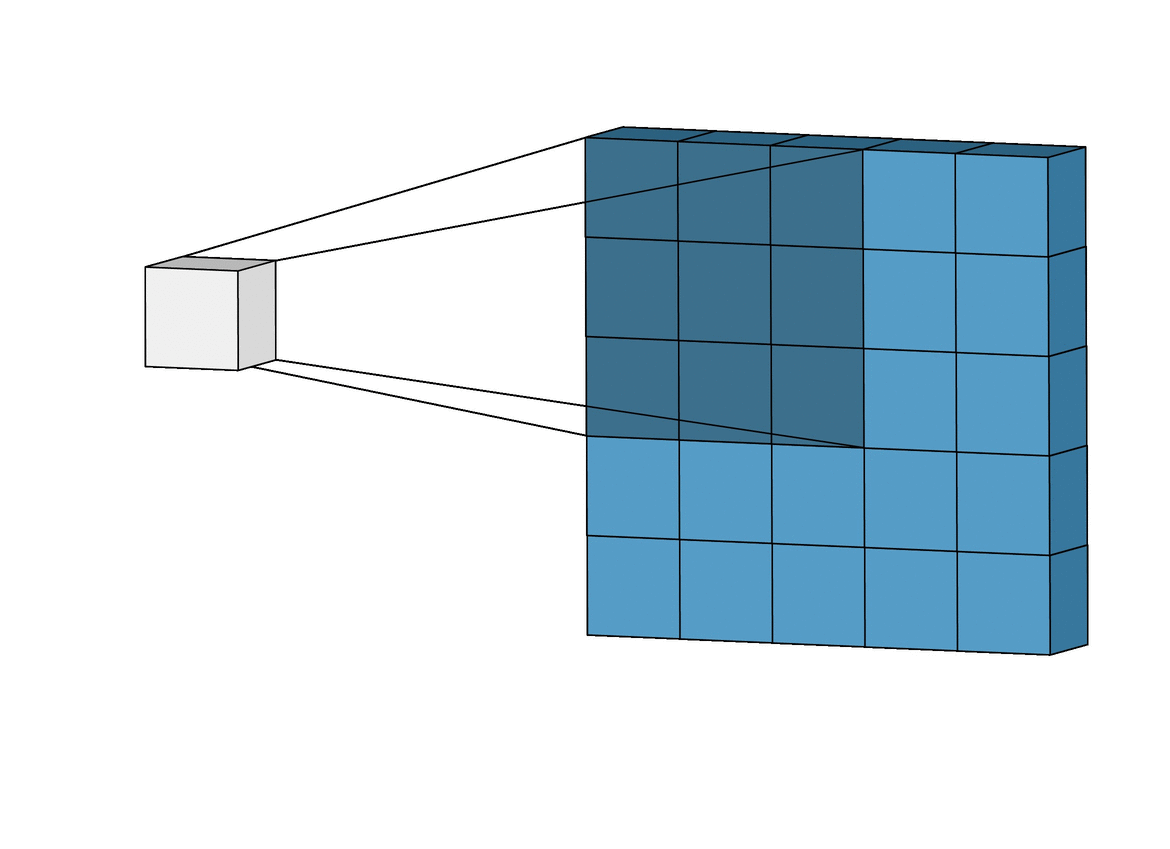

In [10]:
#@title Kernel and Convolution animation 
#code that did this
from google.colab import drive    
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

gifPath = "/content/drive/My Drive/Data/kernel_convolution_animation.gif" 

with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

So thats a convolution. We will then pass the convolution output through a non-linearity (activation). Our structure so far is Input -> Convolution Layer -> Non-Linearity. We now need to pass it through whats called a pooling layer

# **Why do we need a pooling layer**

Pooling layers reduce the dimensions of the layers by summarising the features in the feature map given by the convolution layer.

# **Pooling Layer**
With **two dimensions, a kernel** is the same thing as a **filter**. But for more dimensions, **a filter is multiple kernels stacked together**.

Stride is **defined** the same as it was for a convolutional layer.

The most common way of pooling is called **max pooling**, but there is also another way called average pooling that doesn't get used as often. Heres an example:

Say we define a filter size of 2x2, and a stride of 2 and we apply this filter to a 4 x 4 feature map.
By doing this, we can reduce the dimension of the feature map from 4x4 to 2x2. To do it, we follow the procedure displayed in the image below.




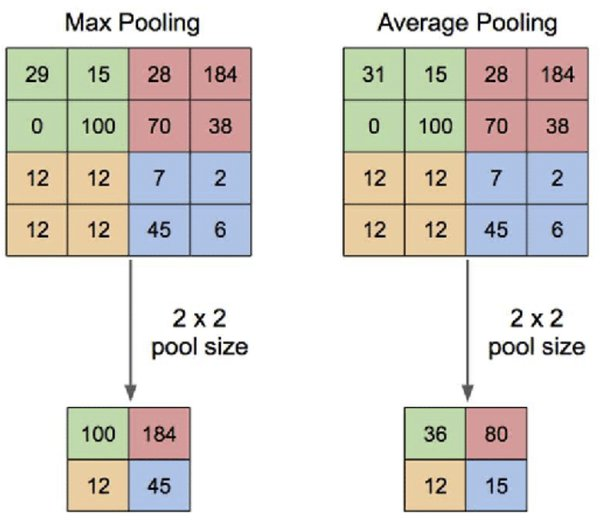

In [11]:
#@title Max and Average Pooling Example
j_path = "/content/drive/My Drive/Data/pooling_image.jfif" 


with open(j_path,'rb') as f:
    display.Image(data=f.read(), format='png')

So pooling is a way to decrease the number of dimensions and reduce the problem of overfitting. It reduces the problem of overfitting because it 'destroys' multiple parameters learned by the convolution layer. This in turn decreases the number of features in the model, which reduces overfitting. 

Also, notice that there is no learning going on in this step. The only computations to be done are to look at the weights in the filter and find the maximum for each part. So this step is not that computationally expensive either. 

SO by now our network structure is Input -> Convolution Layer -> Non-Linearity -> Pooling (Max or Avg) Layer

Finally, we put this smaller dimension data into some **fully-connected layers**. These last layers act as **a regular neural network would**. Below, I added an example of a small convnet using tensorflow

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#we are going to classify mnist with a cnn
#first step fetch, reshape, normalize, and one hot 
#fetch data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#reshape
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
#float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

#one hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [51]:
#second step: define and compile the model
model = tf.keras.Sequential([
    #first layer, convolution on the input layer. 32 3x3 filters on the input
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),#do max pooling with a pool/filter size of 2x2 
    tf.keras.layers.Flatten(),#flatten and pass into the fully connected part of the model
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer ='he_uniform'),
    tf.keras.layers.Dense(10, activation='softmax')
])
#compile optimize with stochastic gradient descent, with a learning rate of 0.01 and momentum of 0.9
optim = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer = optim, loss='categorical_crossentropy', metrics = ['accuracy'])


In [66]:
#fit the model and evaluate performance
history = model.fit(x_train, y_train, epochs= 10, batch_size = 32, validation_split = .2, verbose = 0)
print("Training Accuracy:>" + str(round(history.history['accuracy'][-1], 3)))#print training accuracy rounded to 3 decimal places when its done fitting

Training Accuracy:>1.0


# **These are the code snippets to plot these metrics**

In [62]:
#@title Plot Accuracy Plot
%%capture
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')
plt.show()
#if validation loss went up while training loss went down, that would mean the model is overfitting the training dataset 

In [63]:
#@title Plot Loss Plot
%%capture
#plot training vs validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = 'lower right')
#if training accuracy went up while validation accuracy went down, that would be the result of overfitting the training set

In [64]:
#@title Plot all Metrics
%%capture
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [65]:
#@title Get Test Accuracy and Loss values
#evaluate model
%%capture
mets = model.evaluate(x_test, y_test)
print(mets)
#10 epochs
#gets 98.68 % acc w a batch size of 32
#gets gets 98.66 acc w/o batch size
#50 epochs gets test accuracy of 98.81

# **Results Of ConvNet vs Fully Connected Classifier**
After 10 epochs of training, my convnet gets 98.6 percent test accuracy, compared to my fully connected mnist classifier which gets 98.17 percent test accuracy after 10 epochs. And when I ramp up the epochs to 50, the convnet gets 98.81 and the fully connected classifier gets 98.37. 

This number of epochs is extreme, it took the convnet around 30 minutes to train and it showed signs of overfitting. So an accuracy of around 98.8 can be expected, which is very good. 

By looking at the graphs below, you can easily tell that accuracy on both sets begins to plateau at about the ten epoch mark. The same thing can be said for the fully connected mnist classifier. Although the validation accuracy seems to be getting better up to around 20 epochs, the validation loss begins to climb from epoch 10. This suggests that the fully connected classifier is beginning to overfit the training dataset, and training should stop.

Analyzing the data like this can significantly reduce how long it takes to test and 'roll out' the model. In this instance, it took the Convnet around 30 minutes to train for 50 epochs. However, if you were working with larger resolution pictures or larger datasets, it could take many times that. So this is a really important step to take.

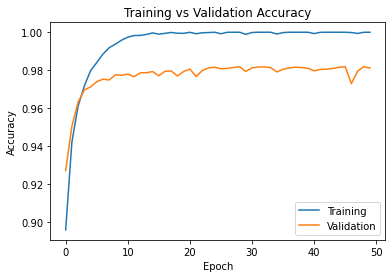

In [57]:
#@title Fully Connected Accuracy Plot
j_path = "/content/drive/My Drive/Data/fully_connected_accuracy_plot.png" 


with open(j_path,'rb') as f:
    display.Image(data=f.read(), format='png')

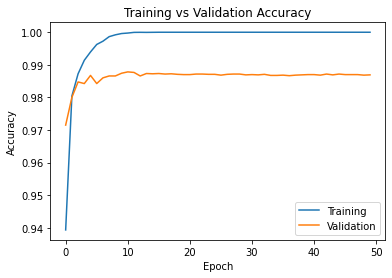

In [59]:
#@title Convnet Accuracy Plot
j_path = "/content/drive/My Drive/Data/convnet_accuracy_plot.png" 


with open(j_path,'rb') as f:
    display.Image(data=f.read(), format='png')

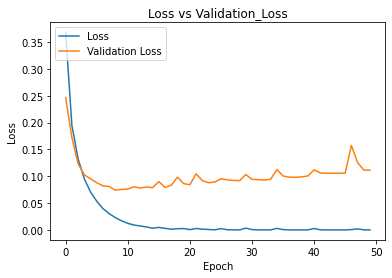

In [60]:
#@title Fully Connected Loss Plot
j_path = "/content/drive/My Drive/Data/fully_connected_loss_plot.png" 


with open(j_path,'rb') as f:
    display.Image(data=f.read(), format='png')

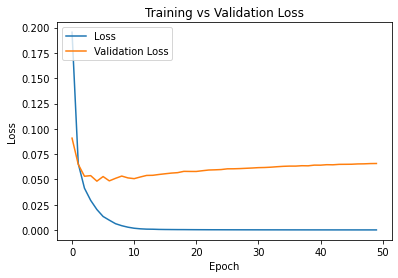

In [58]:
#@title Convnet Loss Plot
j_path = "/content/drive/My Drive/Data/convnet_loss_plot.png" 


with open(j_path,'rb') as f:
    display.Image(data=f.read(), format='png')